In [2]:
import os
import cv2
from matplotlib import pyplot as plt
import random
import pandas as pd
import numpy as np

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten

In [4]:
#setting gpu growth
gpu = tf.config.experimental.list_physical_devices()
# for g in gpu:
#     tf.config.experimental.set_memory_growth(gpu, True)
print(gpu)

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [5]:
pospath = os.path.join('data', 'positive')
negpath = os.path.join('data', 'negative')
anchor = os.path.join('data', 'anchor')

In [6]:
os.makedirs(pospath)
os.makedirs(negpath)
os.makedirs(anchor)

In [9]:
for directories in os.listdir("lfw"):
    for files in os.listdir(os.path.join('lfw',directories)):
        ex = os.path.join("lfw", directories, files)
        new = os.path.join(negpath, files)
        os.replace(ex, new)

In [6]:
import uuid

In [7]:
cap  = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    frame = frame[80:250+80, 200:250+200, :]    
    cv2.imshow('image', frame)
    if cv2.waitKey(1) & 0XFF == ord('a'):
        img = os.path.join(anchor, '{}.jpg'.format(uuid.uuid1()))
        cv2.imwrite(img, frame)
        
    if cv2.waitKey(1) & 0XFF == ord('p'):
        img = os.path.join(pospath, '{}.jpg'.format(uuid.uuid1()))
        cv2.imwrite(img, frame)
    if cv2.waitKey(1) & 0XFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()    

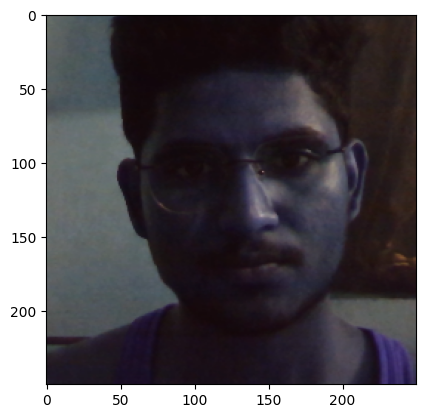

In [29]:
plt.imshow(frame[80:250+80, 200:250+200, :])
